<a href="https://colab.research.google.com/github/ayudixit/ML_Training/blob/main/Divisive_Clustering_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

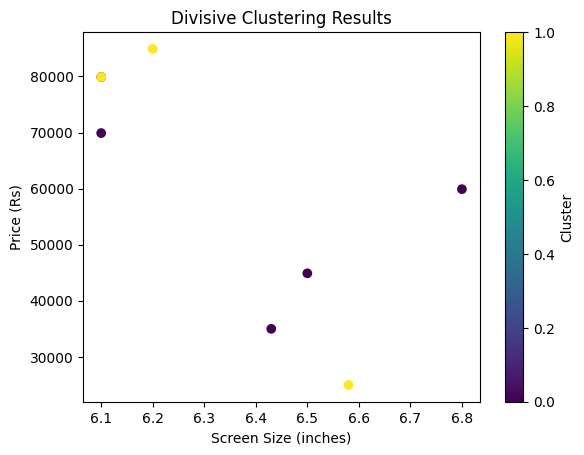

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (Rs)  Cluster  
0               1170       79900      0.0  
1               1170       69900      0.0  
2               1080       79900      1.0  
3               1080       84900      1.0  
4               1080       59900      0.0  
5               1080       44900      0.0  
6               1080       35000      0.0  
7               1080      

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the mobile display data
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (Rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Divisive Clustering (DIANA-like approach using KMeans to recursively split the clusters)
def divisive_clustering(data, min_cluster_size=2, max_depth=3):
    # Start with all data in one cluster
    clusters = [np.arange(data.shape[0])]  # list of indices for the whole dataset
    cluster_labels = -1 * np.ones(data.shape[0])  # Initialize cluster labels with -1

    # Recursively split the clusters
    def split_cluster(cluster_idx, depth):
        if depth >= max_depth or len(clusters[cluster_idx]) <= min_cluster_size:
            return

        # Perform KMeans to split the cluster into two
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(data[clusters[cluster_idx]])  # Fit KMeans to the subset of data

        # Assign cluster labels to the indices in this cluster
        cluster_labels[clusters[cluster_idx]] = kmeans.labels_

        # Split the cluster and recurse
        left_cluster_idx = len(clusters)
        right_cluster_idx = len(clusters) + 1
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 0])
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 1])

        split_cluster(left_cluster_idx, depth + 1)
        split_cluster(right_cluster_idx, depth + 1)

    # Initialize splitting
    split_cluster(0, 0)

    return cluster_labels

# Step 6: Apply Divisive Clustering
df['Cluster'] = divisive_clustering(scaled_features)

# Step 7: Visualize the results with a scatter plot
plt.scatter(df['Screen Size (inches)'], df['Price (Rs)'], c=df['Cluster'], cmap='viridis')
plt.title('Divisive Clustering Results')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (Rs)')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)', 'Cluster']])